In [1]:
import sys
sys.path.append('../..')
import numpy as np
import matplotlib.pyplot as plt

# __Avoiding Barren Plateaus in Variational Quantum Algorithms__

A project by Felipe Quinteros (UdeC, Chile), Mariana Navarro (ICFO, Spain), Jorge Gidi (UdeC, Chile), and Luciano Pereira (IFF-CSIC, Spain) for the Open Hackathon in the Qhack 2023.

## **Introduction**

__Variational quantum algorithms__ have the potential to solve real-world practical problems with quantum computers in the near term [1]. They are hybrid quantum-classical algorithms that optimize an objective function encoded on a hamiltonian over a parametric quantum circuit. This objective function is efficiently evaluated in a quantum computer, while a classical computer is used to drive the optimization. The variational algorithms find applications in areas such as chemistry and finance.  

<img src="https://github.com/jgidi/quantum-barren-plateaus/blob/main/imgs/fig1_from_Noisy_intermediate_scale_quantum_algorithms.JPG?raw=true" width=500 style="display: block; margin: 0 auto" >

In order to reach real-word applications with variational algorithms, we have to overcome a big issue: the __barren plateau phenomenon__ [2,3]. This consists of the lack of convergence due to the vanishing of the cost function gradient. Pictorially, we can think that the landscape of the objective function is too flat, as shown in the figure, so any optimization method stuck. 

<img src="https://github.com/jgidi/quantum-barren-plateaus/blob/main/imgs/fig2_from_cost_function_induced_barren_plateau.JPG?raw=true" width=600 style="display: block; margin: 0 auto"  >

This problem can appear, among other, due to the following reasons:

__1.- The cost function is global__, i.e., involves measurements in many qubits [2]. For example, consider the $n$-qubits Hamiltonian 
\begin{equation}
H = I^{\otimes n}-|0^{\otimes n}\rangle\langle 0^{\otimes n}|.
\end{equation}
This Hamiltonian require a measurement over $|0^{\otimes n}\rangle$, wich involve all the $n$ qubits. Thereby, the sample of shots $N_{shots}$ used to evaluate $H$ has to split into $2^n$ outputs. In the case $N_{shots}<2^n$, which always happens for large $n$, the number of shots is not enough large to perform a precise evaluation of $H$, so that its gradient vanish and the barren plateau appears. This occurs independently of the shape and the depth of the variational circuit.

<img src="https://github.com/jgidi/quantum-barren-plateaus/blob/main/imgs/fig3_from_cost_function_induced_barren_plateau.JPG?raw=true" width=500 style="display: block; margin: 0 auto"  >

In [2] the authors recommend avoiding this kind of Hamiltonian in the early iterations of the algorithm and instead employ a local hamiltonian $$H_L = I^{\otimes n}-\frac{1}{n}\sum_{j=1}^n I_{1}\otimes\cdots\otimes I_{j+1}\otimes|0_j\rangle\langle 0_j|\otimes I_{j-1}\otimes\cdots\otimes I_{n}.$$ Each term of this hamiltonian involves a single-qubits measurement, so that can be accurately evaluated with a small $N_{shots}$. The authors demonstrate that this kind of Hamiltonian can be used to train variational circuits with depth $\log(n)$.  

<img src="https://github.com/jgidi/quantum-barren-plateaus/blob/main/imgs/fig4_from_cost_function_induced_barren_plateau.JPG?raw=true" width=500 style="display: block; margin: 0 auto"  >

__2.- The parametric quantum circuit is too expressive__, that is equivalent to saying that the parametric circuit approximates a 2-design [3]. When this condition is fulfilled the average gradient of the cost functions is null and its variance decay exponentially. $$ \mathbb{E}( \nabla \langle H\rangle )=0, \qquad {\rm Var}( \nabla \langle H\rangle ) \sim \frac{1}{2^n}.$$ Almost any variational circuit composed of layers of local gates intercalated with layers of entangling gates satisfies this condition. Reducing the expressibility of variational circuits is a way to avoid barren plateaus, as is suggested in [4]. 

<img src="https://github.com/jgidi/quantum-barren-plateaus/blob/main/imgs/fig5_from_mitigating_barren_plateaus_of_vqes.JPG?raw=true" width=500 style="display: block; margin: 0 auto"  >

__3.- The initial condition for the optimization is too far from the solution__, which happens extremely often when is taken randomly. Having good initial conditions increase the probability to start the optimization with a non-zero gradient so that the protocol can converge to the optimum. For example, in [5] is proposed to classically pre-train the variational circuit with tensor networks to have a good initial condition for the quantum optimization. 

<img src="https://github.com/jgidi/quantum-barren-plateaus/blob/main/imgs/fig6_from_MPS_pretraining.JPG?raw=true" width=400 style="display: block; margin: 0 auto"  >

__4.- The problem of a lifetime: the noise__ [6]. The impact of the noise can be reduced by hardware-efficient circuits and local measurements. 

<img src="https://github.com/jgidi/quantum-barren-plateaus/blob/main/imgs/fig7_from_noise_induced_BP.JPG?raw=true" width=400 style="display: block; margin: 0 auto"  >

## __Our Project__
In this project, we develop a __Qiskit module__ that includes several proposals to reduce the impact of barren plateaus in variational quantum algorithms. We also provide an early implementation on __Pennylane__. In this notebook, we include a demo of each feature. For more details visit each individual tutorial notebook. 

a.- [Avoiding Cost-function induced Barren Plateaus](https://github.com/jgidi/quantum-barren-plateaus/blob/d89ac2b072019616ebb313357f6346980e6d42ca/Tutorials/CostFunction_BarrenPlateaus.ipynb)

b.- [State Efficient Ansatz](https://github.com/jgidi/quantum-barren-plateaus/blob/932915a8d6a35c4e6cbca76322e7f5a825a4e000/Tutorials/State_Efficient_Ansatz_BeH2.ipynb)

c.- [Classical Pretraining](https://github.com/jgidi/quantum-barren-plateaus/blob/3ab5be7d7c68b66296c6460ba1fd1bb7c8f4d8c8/Tutorials/MPS_pretraining.ipynb)

d.- [Combining the methods](https://github.com/jgidi/quantum-barren-plateaus/blob/d89ac2b072019616ebb313357f6346980e6d42ca/Tutorials/Combining_methods.ipynb)

e.- [Early implementation on Pennylane](https://github.com/jgidi/quantum-barren-plateaus/blob/dceb5d06908d3c97c6324d5bc29d48592db81e09/Tutorials/Tutorial_early_pennylane.ipynb)

Along this notebook, we will use the Hamiltonian $H$ given by (1), which exhibits a barren plateau for a small number of qubits. This can be loaded as follow:

In [2]:
from qubap.qiskit.hamiltonians import test_hamiltonian
from qubap.qiskit.variational_algorithms import classical_solver

In [3]:
num_qubits = 6
H = test_hamiltonian( num_qubits )
print(H)

0.984375 * IIIIII
- 0.015625 * IIIIIZ
- 0.015625 * IIIIZI
- 0.015625 * IIIIZZ
- 0.015625 * IIIZII
- 0.015625 * IIIZIZ
- 0.015625 * IIIZZI
- 0.015625 * IIIZZZ
- 0.015625 * IIZIII
- 0.015625 * IIZIIZ
- 0.015625 * IIZIZI
- 0.015625 * IIZIZZ
- 0.015625 * IIZZII
- 0.015625 * IIZZIZ
- 0.015625 * IIZZZI
- 0.015625 * IIZZZZ
- 0.015625 * IZIIII
- 0.015625 * IZIIIZ
- 0.015625 * IZIIZI
- 0.015625 * IZIIZZ
- 0.015625 * IZIZII
- 0.015625 * IZIZIZ
- 0.015625 * IZIZZI
- 0.015625 * IZIZZZ
- 0.015625 * IZZIII
- 0.015625 * IZZIIZ
- 0.015625 * IZZIZI
- 0.015625 * IZZIZZ
- 0.015625 * IZZZII
- 0.015625 * IZZZIZ
- 0.015625 * IZZZZI
- 0.015625 * IZZZZZ
- 0.015625 * ZIIIII
- 0.015625 * ZIIIIZ
- 0.015625 * ZIIIZI
- 0.015625 * ZIIIZZ
- 0.015625 * ZIIZII
- 0.015625 * ZIIZIZ
- 0.015625 * ZIIZZI
- 0.015625 * ZIIZZZ
- 0.015625 * ZIZIII
- 0.015625 * ZIZIIZ
- 0.015625 * ZIZIZI
- 0.015625 * ZIZIZZ
- 0.015625 * ZIZZII
- 0.015625 * ZIZZIZ
- 0.015625 * ZIZZZI
- 0.015625 * ZIZZZZ
- 0.015625 * ZZIIII
- 0.015625 * ZZIIIZ
- 

The ground state of $H$ is given by $|0^{\otimes n}\rangle$ with energy $E_{min}=0$.

In [4]:
exact_min_energy = classical_solver(H).eigenvalue
exact_min_energy

0j

__Let us find the ground state of $H$ with a standard VQE__. Given that the solution is a separable state, we are going to use a parametric circuit composed by a single layer of RY and RZ gates. All our variational algorithm routines employ __SPSA__ as classical optimizer. We adopt this method because it has been shown to be robust against noise [7], so it can help to minimize the effect of a noise-induced barren plateau. Notice that in order to simplify the numerical simulations we employ a small number of shot in each energy evaluation. This allows to obtain a barren plateau more easily.

In [5]:
from qiskit.circuit.library import EfficientSU2
from qubap.qiskit.variational_algorithms import VQE, energy_evaluation 
from qiskit_aer import AerSimulator

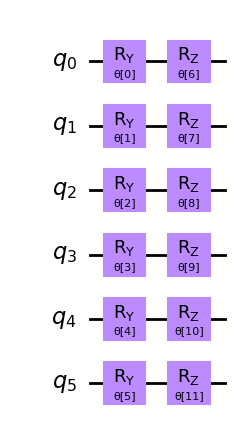

In [6]:
num_reps = 0
ansatz = EfficientSU2( num_qubits, ['ry','rz'], 'circular', num_reps).decompose()
ansatz.draw('mpl')

In [7]:
np.random.seed(102)
initial_guess = np.random.randn( ansatz.num_parameters )*np.pi
num_iters     = 300
backend       = AerSimulator( shots=2**6 )

In [8]:
results_vqe = VQE( H, ansatz, initial_guess, num_iters, backend )
analitic_results_vqe = [ energy_evaluation( H, ansatz, x, AerSimulator(method='statevector') ) for x in results_vqe['x'] ]

c:\Users\lucia\miniconda3\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


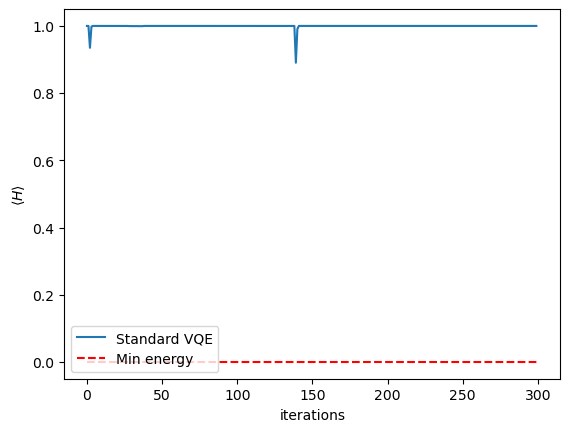

In [9]:
plt.plot( analitic_results_vqe )
plt.hlines( exact_min_energy, 0, num_iters, 'r', '--')
plt.xlabel('iterations')
plt.ylabel(r'$\langle H \rangle$')
plt.legend(['Standard VQE', 'Min energy'])

We can see that $H$ exhibits a barren plateau for 6 qubits when $2^6$ shots for the energy evaluations. Notice that we are fixing a seed for the simulation for reproducibility and not for convenience. You can run this simulation with other seeds and you going to see that barren plateau remains in most of them.

## __Avoiding cost-function induced barren plateaus with local Hamiltonians__

We implement a variational algorithms that avoid __cost-function induced barren plateaus__ by optimizing first a __local hamiltonian__ $H_L$ as ins described in [2].

In [10]:
from qubap.qiskit.cost_function_barren_plateau import global2local

In [11]:
H_local = global2local( H )
print( H_local )

0.5000000000000069 * IIIIII
- 0.08333333333333334 * ZIIIII
- 0.08333333333333334 * IZIIII
- 0.08333333333333334 * IIZIII
- 0.08333333333333334 * IIIZII
- 0.08333333333333334 * IIIIZI
- 0.08333333333333334 * IIIIIZ


We can search the ground state of $H$ employing the function `VQE_shift`, which optimize first $H_{L}$ and then $H$. We do 30 iterations for $H_{L}$ and 270 for $H$.

In [12]:
from qubap.qiskit.variational_algorithms import VQE_shift

In [13]:
np.random.seed(200)
results_shift = VQE_shift( H_local, H, ansatz, initial_guess, num_iters, num_iters//10, backend )
analitic_results_local  = [ energy_evaluation( H, ansatz, x, AerSimulator(method='statevector') ) for x in results_shift['in']['x'] ]
analitic_results_global = [ energy_evaluation( H, ansatz, x, AerSimulator(method='statevector') ) for x in results_shift['out']['x'] ]

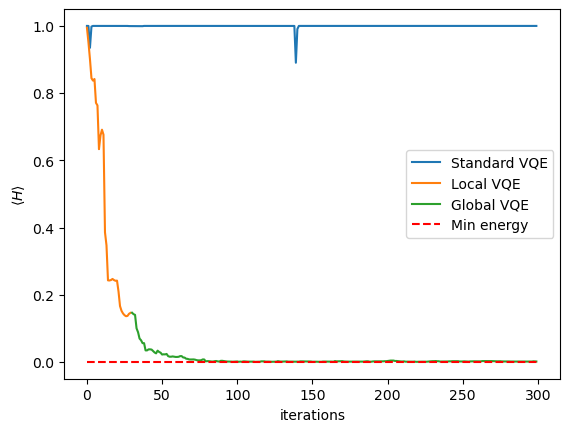

In [14]:
plt.plot( analitic_results_vqe )
plt.plot( analitic_results_local )
plt.plot( range(num_iters//10,num_iters),  analitic_results_global )
plt.hlines( exact_min_energy, 0, num_iters, 'r', '--')
plt.xlabel('iterations')
plt.ylabel(r'$\langle H \rangle$')
plt.legend(['Standard VQE','Local VQE','Global VQE', 'Min energy'])

We can see that while the standard VQE has a barren plateau, the concatenation of optimizing of the local and global hamiltonians converges to the optimum. We avoid the barren plateau!!! 

A smart strategy to find the ground state of $H$ is to perform an __adiabatic__ change between $H_L$ and $H$ along the optimization [8], that is
$$ H_k  = \lambda_k H_L + (1-\lambda_k)H.   $$
This is implemented in the function `VQE_adiabatic` of our module.

In [15]:
from qubap.qiskit.variational_algorithms import VQE_adiabatic

In [16]:
np.random.seed(250)
results_adiabatic = VQE_adiabatic( H_local, H, ansatz, initial_guess, num_iters, backend )
analitic_results_adiabatic   = [ energy_evaluation( H, ansatz, x, AerSimulator(method='statevector') ) for x in results_adiabatic['x'] ]

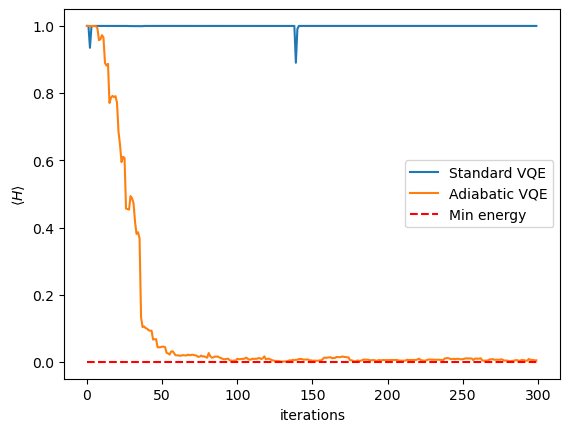

In [17]:
plt.plot( analitic_results_vqe )
plt.plot( analitic_results_adiabatic )
plt.hlines( exact_min_energy, 0, num_iters, 'r', '--')
plt.xlabel('iterations')
plt.ylabel(r'$\langle H \rangle$')
plt.legend(['Standard VQE', 'Adiabatic VQE', 'Min energy'])

## __Avoiding barren plateaus with State Efficient Ansatz__

Employ a less expresive parametric circuits can help to converge to the optimum, for instance using the __State Efficient Ansatz (SEA)__ [4] implemented in our module as `ansatz_constructor`.

In [18]:
from qubap.qiskit.state_efficient_ansatz import ansatz_constructor 

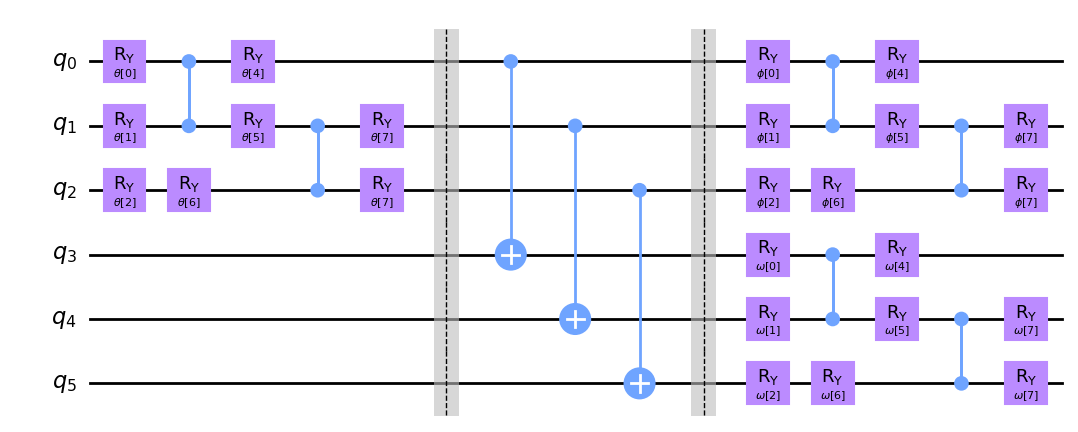

In [19]:
num_iters_sea = 300
num_reps_sea = 1
ansatz_sea   = ansatz_constructor( num_qubits, deep=[num_reps_sea,num_reps_sea,num_reps_sea], set_barrier=True )
np.random.seed(3000)
initial_guess_sea = np.random.randn( ansatz_sea.num_parameters ) * np.pi 
ansatz_sea.decompose().draw( 'mpl' )

In [20]:
results_sae = VQE( H, ansatz_sea, initial_guess_sea, num_iters, backend )
analitic_results_sae = [ energy_evaluation( H, ansatz_sea, x, AerSimulator(method='statevector') ) for x in results_sae['x'] ]

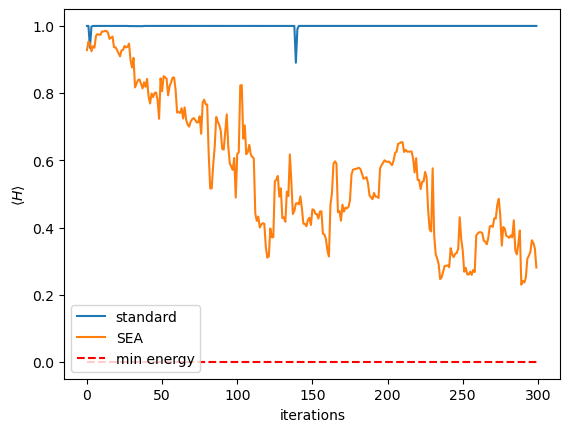

In [21]:
plt.plot( analitic_results_vqe )
plt.plot( analitic_results_sae )
plt.hlines( exact_min_energy, 0, num_iters, 'r', '--')
plt.xlabel('iterations')
plt.ylabel(r'$\langle H \rangle$')
plt.legend(['standard', 'SEA', 'min energy'])

We can see that SEA provides a better performance that the ansatz with local gates in each qubit. __We avoid again the barren plateau!!__

## __Avoid barren plateau with classical pre-training__
We implement a __classical pre-training__ over __Matrix Product States (MPS)__ for a VQE, which can be done efficiently with tensor networks algorithms [5]. This allows us to find a good initial point to start a VQE. 

In [22]:
from qubap.qiskit.mps_pretraining import Ansatz, VQE_pretrained 

We first optimize classically the parametric circuit given by `Ansatz`, which corresponds to a MPS with bond dimension 2.

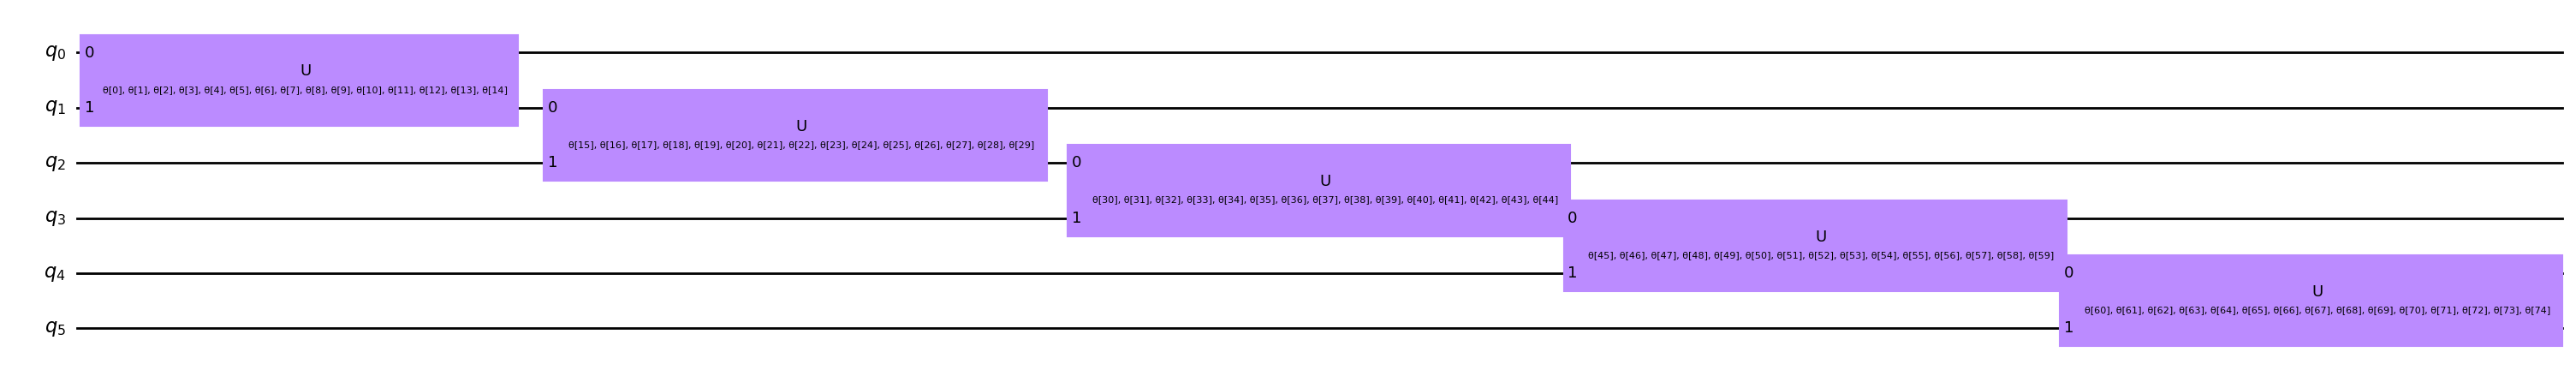

In [23]:
ansatz_mps = Ansatz( num_qubits, diagonal=True )
ansatz_mps.draw('mpl',fold=-1)

Thereafter, we execute a standard VQE extending the previous parametric circuit thanks to the argument `diagonal` of `Ansatz`.

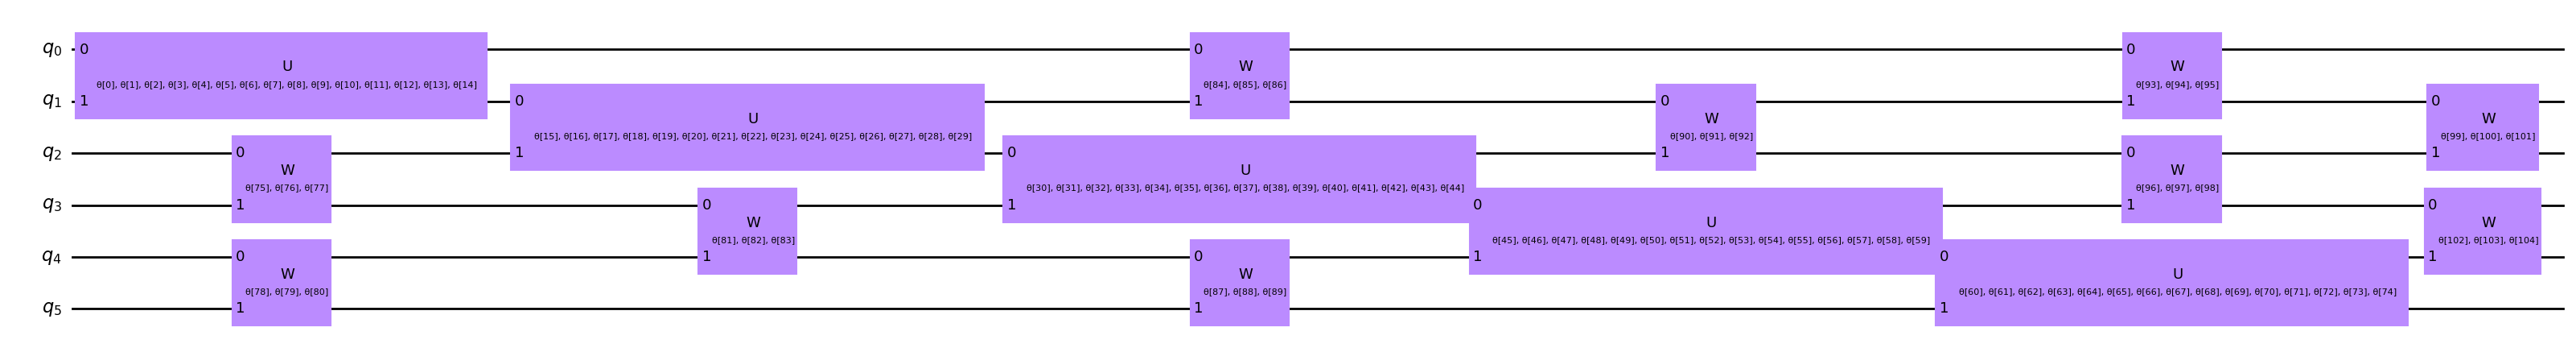

In [24]:
ansatz_full = Ansatz( num_qubits, diagonal=False )
ansatz_full.draw('mpl',fold=-1)

We are going to execute 300 iterations of pretraining and 300 of VQE. __Notice that the quantum resources are equivalently than the previous example because the first 300 iterations are a classical routine.__

In [25]:
num_iters_train = 300

In [26]:
np.random.seed(400)
results_pretrained = VQE_pretrained( H, backend, num_iters, num_iters_train )

In [27]:
analitic_results_full = [ energy_evaluation( H, ansatz_full, x, AerSimulator(method='statevector') ) for x in results_pretrained[0]['x'] ]
analitic_results_mps  = [ energy_evaluation( H, ansatz_mps, x, AerSimulator(method='statevector') ) for x in results_pretrained[1]['x'] ]

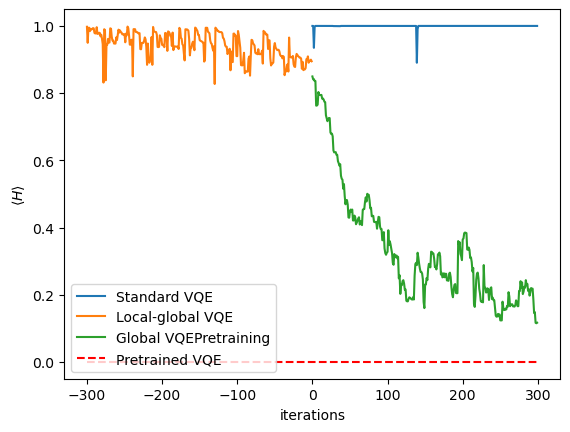

In [28]:
plt.plot( analitic_results_vqe )
plt.plot( range(-num_iters_train,0), analitic_results_mps )
plt.plot( analitic_results_full )
plt.xlabel('iterations')
plt.ylabel(r'$\langle H \rangle$')
plt.hlines( exact_min_energy, -num_iters_train, num_iters, 'r', '--')
plt.legend([ 'Standard VQE', 'Local-global VQE', 'Global VQE' 'Pretraining', 'Pretrained VQE', 'Min energy'])

As we can see, the classical pretraining helps the VQE to converge. __We avoided again again the barren plateau.__

## __Comparing all methods__

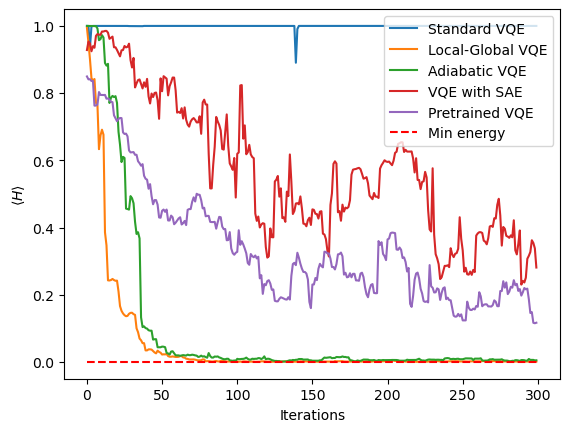

In [29]:
plt.plot( analitic_results_vqe )
plt.plot( analitic_results_local+analitic_results_global  )
plt.plot( analitic_results_adiabatic )
plt.plot( analitic_results_sae )
plt.plot( analitic_results_full )
plt.xlabel('Iterations')
plt.ylabel(r'$\langle H \rangle$')
plt.hlines( exact_min_energy, 0, num_iters, 'r', '--')
plt.legend([ 'Standard VQE', 'Local-Global VQE', 'Adiabatic VQE', 'VQE with SAE', 'Pretrained VQE', 'Min energy'], loc=1)

## __Conclusions__
In this project, we have implemented several methods to __avoid the barren plateaus__ in quantum variational quantum algorithms. You can visit each individual tutorial for more details. Our module __extends the range of applicability of variational algorithms in the medium term__. However, we want to remark that the barren plateau problem has many edges, and __much more work will be needed to develop a highly robust variational algorithm for practical applications__. We hope our routine is a step toward that goal.

## __References__

[1] Noisy intermediate-scale quantum algorithms, Rev. Mod. Phys. 94, 015004 (2002).

[2] Cost function dependent barren plateaus in shallow parametrized quantum circuits, Nat Commun 12, 1791 (2021).

[3] Barren plateaus in quantum neural network training landscapes, Nat Commun 9, 4812 (2018).

[4] Mitigating barren plateaus of variational quantum eigensolvers, arXiv:2205.13539v2 (2022).

[5] Matrix product state pre-training for quantum machine learning, Quantum Sci. Technol. 7, 035014 (2022).

[6] Noise-induced barren plateaus in variational quantum algorithms, Nat Commun 12, 6961 (2021).

[7] Robust and Efficient High-Dimensional Quantum State Tomography, Phys. Rev. Lett. 126, 100402 (2021).

[8] Variational quantum state diagonalization, npj Quantum Inf 5, 57 (2019).


In [30]:
import qiskit.tools.jupyter
%qiskit_version_table